## Feature Exploration

In this section, we are going to compute some of the possible features we will use for training the NN. Additionally, we are going to use only the chest sensor measurements. This will include the following three sensor values:

    ACC -> Accelerometer data
    EDA -> Electrodermal Activity aka GSR (Galvanic Skin Response)
    TEMP -> Skin Temperature (WESAD authors call it "body temperature")


## Experiments

First we will try out the Data module we created to encapsulate importing and extracting the baseline and stress data for a given subject.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
import os
import sys
module = os.path.abspath('C:/Users\\thinkpad\\OneDrive\\Data-Science\\Workstress\\Mods')
#module = os.path.abspath("C:/Users\\18145\\development\\wesad_experiments\\src\\main")
if module not in sys.path:
    sys.path.append(module)
from DataManager import DataManager

In [17]:
data = DataManager()
subject_three = data.load(3) # load subject two data in two dicts, baseline and stress

Loading data for S3


In [18]:
# Let us take a quick look and make sure the Data module is doing what we want.
print('baseline: ', subject_three[0], '\nstress: ', subject_three[1])

baseline:  {'ACC': array([[ 0.78659999, -0.05980003,  0.50479996],
       [ 0.79100001, -0.06160003,  0.50479996],
       [ 0.79299998, -0.06260002,  0.50179994],
       ...,
       [ 0.85220003, -0.0194    , -0.3592    ],
       [ 0.85099995, -0.01980001, -0.3574    ],
       [ 0.85099995, -0.01899999, -0.35619998]]), 'EDA': array([[7.2227478 ],
       [7.22427368],
       [7.2227478 ],
       ...,
       [6.61582947],
       [6.62078857],
       [6.61735535]]), 'Temp': array([[32.989807],
       [33.030365],
       [33.04239 ],
       ...,
       [31.658417],
       [31.667297],
       [31.662842]], dtype=float32)} 
stress:  {'ACC': array([[ 0.8872    ,  0.06700003,  0.074     ],
       [ 0.88820004,  0.06900001,  0.06579995],
       [ 0.89139998,  0.06819999,  0.06159997],
       ...,
       [ 0.91659999,  0.02499998, -0.0248    ],
       [ 0.91540003,  0.02520001, -0.01980001],
       [ 0.91499996,  0.02359998, -0.01660001]]), 'EDA': array([[6.88705444],
       [6.88667297],
      

The preceding output appears satisfactory. We intend to employ a sliding window technique to compute features. However, it is essential to consider that the window size for ACC must differ from that of EDA/Temp.

The chest sensor in question had a sampling frequency of 700Hz, and we will use a 60-second window (42000 samples) for the sliding window approach. While this may seem excessively large, it is worth noting that these physiological measures can respond within seconds to changes in emotional state. To determine if a 60-second window is suitable, we will use a window shift of 1/4 second or 175 samples (as recommended by the WESAD authors).

## Feature extraction
for different physiological signals will be performed using various statistical measures. For ACC data, mean and standard deviation will be computed for each axis. Some papers suggest that summing these values over all the axes may be beneficial, but it is not yet decided whether we will do that or not. Additionally, peak frequency for each axis will also be computed. Temperature sensor data will be used to extract min and max values, dynamic range, mean and standard deviation. Similarly, for EDA data, min and max values, dynamic range, mean and standard deviation will be extracted as features of interest.

In [19]:
temp = subject_three[0]['Temp']
acc = subject_three[0]['ACC']
eda = subject_three[0]['EDA']

temp_stress = subject_three[1]['Temp']
acc_stress = subject_three[1]['ACC']
eda_stress = subject_three[1]['EDA']

## Temperature

In [20]:
print('number of temp values        = ', len(temp))
print('number of eda values         = ', len(eda))
print('number of acc values         = ', len(acc))

print('number of stress temp values = ', len(temp_stress))
print('number of stress eda values  = ', len(eda_stress))
print('number of stress acc values  = ', len(acc_stress))

#print(np.amax(temp))
#print(np.amin(temp))


number of temp values        =  798000
number of eda values         =  798000
number of acc values         =  798000
number of stress temp values =  448000
number of stress eda values  =  448000
number of stress acc values  =  448000


In [21]:
window_size = 42000
window_shift = 175
max_temp = []
min_temp = []
dynamic_range_temp = []
for i in range(0,len(temp) - window_size,window_shift):
    window = temp[i:window_size + i]
    max_temp.append(np.amax(window))
    min_temp.append(np.amin(window))
    dynamic_range_temp.append(max_temp[-1] - min_temp[-1]) 


In [22]:
print(max_temp[0:5])
print(min_temp[0:5])
print(dynamic_range_temp[0:5])

[33.20334, 33.20334, 33.20334, 33.171722, 33.171722]
[32.10724, 32.10724, 32.10724, 32.10724, 32.10724]
[1.0960999, 1.0960999, 1.0960999, 1.0644836, 1.0644836]


These values look good for celsius and make sense. 

## EDA

Some features of interest for the EDA data are:

  1. Min and max value
  2. Dynamic Range
  3. Mean and STD


In [23]:
print(len(eda))
print(np.amax(eda))
print(np.amin(eda))

798000
8.93096923828125
6.2122344970703125


In [24]:
max_eda = []
min_eda = []
dynamic_range_eda = []
for i in range(0,len(eda) - window_size,window_shift):
    window = eda[i:window_size + i]
    max_eda.append(np.amax(window))
    min_eda.append(np.amin(window))
    dynamic_range_eda.append(max_eda[-1] - min_eda[-1]) 

In [25]:
print(max_eda[0:6])
print(min_eda[0:6])
print(dynamic_range_eda[0:6])

[8.815383911132812, 8.815383911132812, 8.815383911132812, 8.815383911132812, 8.815383911132812, 8.815383911132812]
[7.0087432861328125, 7.0087432861328125, 7.0087432861328125, 7.0087432861328125, 7.0087432861328125, 7.0087432861328125]
[1.806640625, 1.806640625, 1.806640625, 1.806640625, 1.806640625, 1.806640625]


In [26]:
window_size = 42000
window_shift = 175
eda_features_stress = data.get_stats(eda_stress, window_size, window_shift)
eda_features_base = data.get_stats(eda, window_size, window_shift)

In [27]:
get
    print('number of eda values max           = ', len(eda_features_base['max']))
    print('number of stress eda values max    = ', len(eda_features_stress['max']))

    print('number of eda values min           = ', len(eda_features_base['min']))
    print('number of stress eda values min    = ', len(eda_features_stress['min']))

    print('number of eda values mean          = ', len(eda_features_base['mean']))
    print('number of stress eda values mean   = ', len(eda_features_stress['mean']))

    print('number of eda values range         = ', len(eda_features_base['range']))
    print('number of stress eda values range  = ', len(eda_features_stress['range']))

    print('number of eda values std           = ', len(eda_features_base['std']))
    print('number of stress eda values std    = ', len(eda_features_stress['std']))


number of eda values max           =  4320
number of stress eda values max    =  2320
number of eda values min           =  4320
number of stress eda values min    =  2320
number of eda values mean          =  4320
number of stress eda values mean   =  2320
number of eda values range         =  4320
number of stress eda values range  =  2320
number of eda values std           =  4320
number of stress eda values std    =  2320


In [29]:
print(eda_features_stress['min'][0:10])

[6.7279815673828125, 6.7279815673828125, 6.7279815673828125, 6.7279815673828125, 6.7279815673828125, 6.7279815673828125, 6.7279815673828125, 6.7279815673828125, 6.7279815673828125, 6.7279815673828125]


In [30]:
import matplotlib.pyplot as plt
import pandas as pd

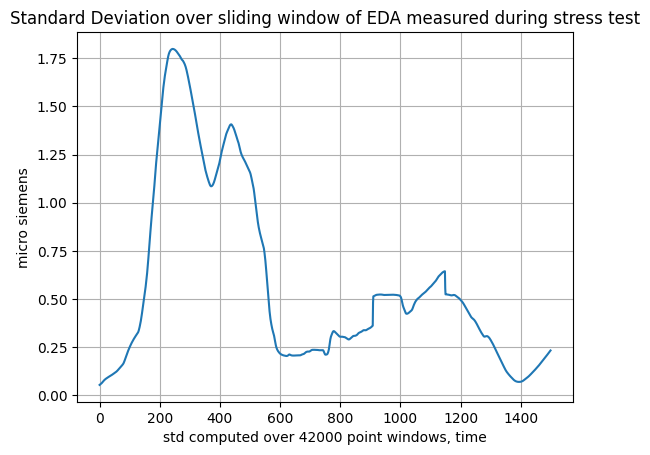

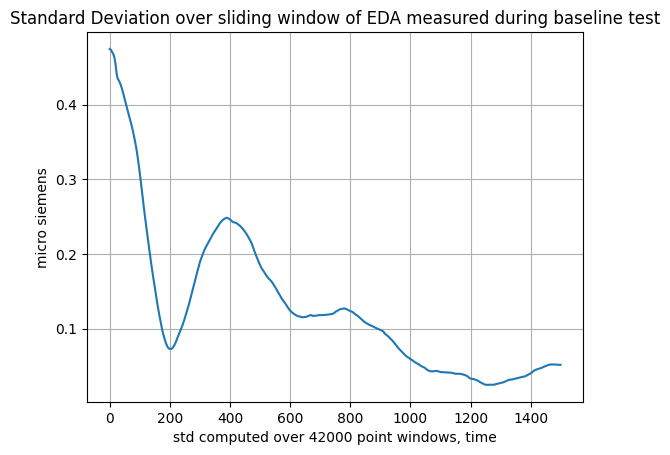

In [31]:
range_to_plot = range(1500)
fig1, ax1 = plt.subplots()
ax1.plot(list(range_to_plot), eda_features_stress['std'][0:max(range_to_plot)+1])

ax1.set(xlabel='std computed over 42000 point windows, time', ylabel = 'micro siemens',
        title = 'Standard Deviation over sliding window of EDA measured during stress test')
ax1.grid()
plt.show()


fig, ax = plt.subplots()
ax.plot(list(range_to_plot), eda_features_base['std'][0:max(range_to_plot)+1])

ax.set(xlabel='std computed over 42000 point windows, time', ylabel = 'micro siemens',
       title = 'Standard Deviation over sliding window of EDA measured during baseline test')
ax.grid()
plt.show()

This is an intriguing observation. As we have noted before, the initial baseline readings are not particularly consistent for EDA. Although there are some spikes where the variance increased during the baseline test, mostly at the beginning, it is evident that there is considerably more variability in the stress data than in the baseline data.

## Temperature

In [33]:
temp_features_stress = data.get_stats(temp_stress, window_size)
temp_features_base = data.get_stats(temp, window_size)

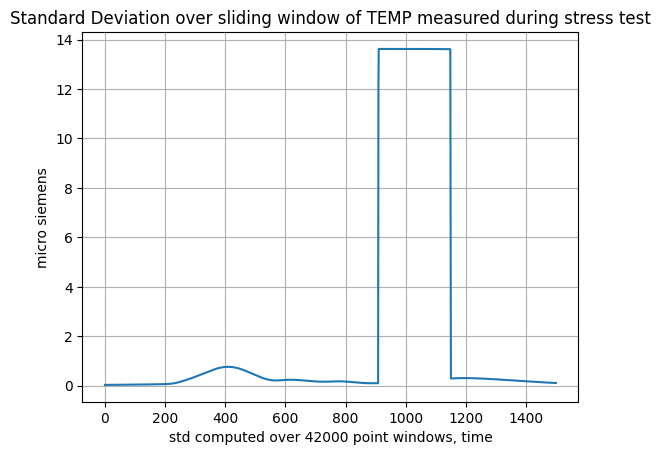

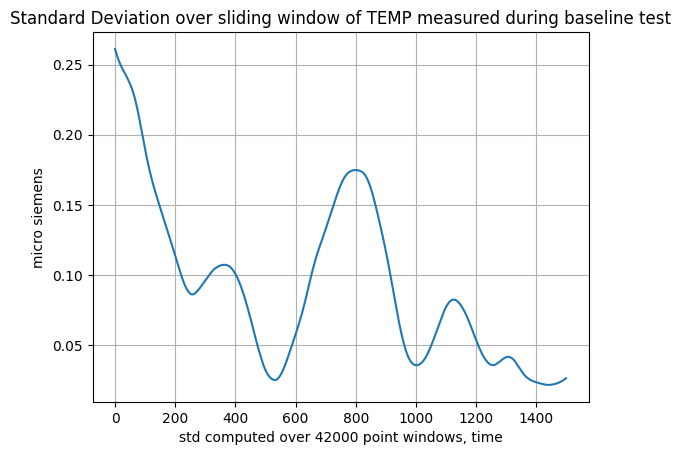

In [34]:
range_to_plot = range(1500)
fig1, ax1 = plt.subplots()
ax1.plot(list(range_to_plot), temp_features_stress['std'][0:max(range_to_plot)+1])

ax1.set(xlabel='std computed over 42000 point windows, time', ylabel = 'micro siemens',
        title = 'Standard Deviation over sliding window of TEMP measured during stress test')
ax1.grid()
plt.show()


fig, ax = plt.subplots()
ax.plot(list(range_to_plot), temp_features_base['std'][0:max(range_to_plot)+1])

ax.set(xlabel='std computed over 42000 point windows, time', ylabel = 'micro siemens',
       title = 'Standard Deviation over sliding window of TEMP measured during baseline test')
ax.grid()
plt.show()

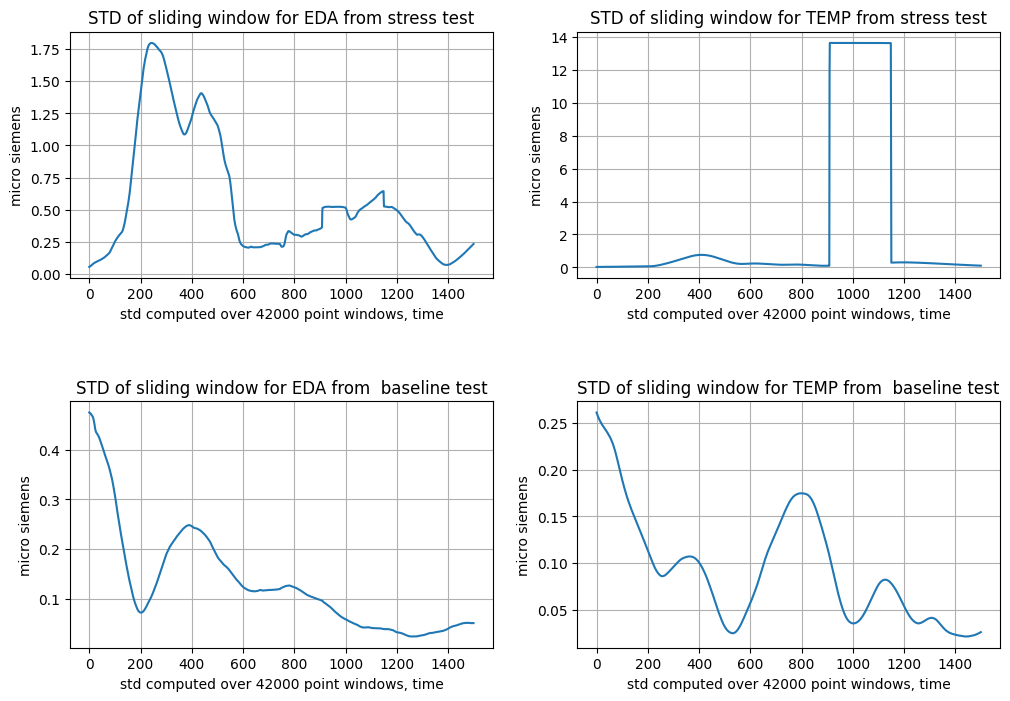

In [35]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=.5)

ax221 = plt.subplot(2, 2, 1)
ax221.plot(list(range_to_plot), eda_features_stress['std'][0:max(range_to_plot)+1])

ax221.set(xlabel='std computed over 42000 point windows, time', ylabel = 'micro siemens',
        title = 'STD of sliding window for EDA from stress test')
ax221.grid()


ax223 = plt.subplot(2, 2, 3)
ax223.plot(list(range_to_plot), eda_features_base['std'][0:max(range_to_plot)+1])

ax223.set(xlabel='std computed over 42000 point windows, time', ylabel = 'micro siemens',
       title = 'STD of sliding window for EDA from  baseline test')
ax223.grid()

ax222 = plt.subplot(2, 2, 2)
ax222.plot(list(range_to_plot), temp_features_stress['std'][0:max(range_to_plot)+1])

ax222.set(xlabel='std computed over 42000 point windows, time', ylabel = 'micro siemens',
        title = 'STD of sliding window for TEMP from stress test')
ax222.grid()


ax224 = plt.subplot(2, 2, 4)
ax224.plot(list(range_to_plot), temp_features_base['std'][0:max(range_to_plot)+1])

ax224.set(xlabel='std computed over 42000 point windows, time', ylabel = 'micro siemens',
       title = 'STD of sliding window for TEMP from  baseline test')
ax224.grid()
plt.show()

In [36]:
cov1 = np.cov(eda_features_base['std'], temp_features_base['std'])
print('base covariance matrix for std of eda vs temp =\n', cov1)
cov2 = np.cov(eda_features_stress['std'], temp_features_stress['std'])
print('stress covariance matrix for std of eda vs temp =\n', cov2)

base covariance matrix for std of eda vs temp =
 [[0.00626488 0.00283217]
 [0.00283217 0.00212421]]
stress covariance matrix for std of eda vs temp =
 [[ 0.1925852   0.17514738]
 [ 0.17514738 16.81742188]]


In [37]:
from scipy.stats import pearsonr

print("Checking for correlation between TEMP and EDA std.")
corr1, _ = pearsonr(eda_features_base['std'], temp_features_base['std'])
print('Pearsons correlation for base eda vs temp: %.3f' % corr1)
corr2, _ = pearsonr(eda_features_stress['std'], temp_features_stress['std'])
print('Pearsons correlation for stress eda vs temp: %.3f' % corr2)

from scipy.stats import spearmanr
corr3, _ = spearmanr(eda_features_base['std'], temp_features_base['std'])
print('Spearmans correlation for base eda vs temp: %.3f' % corr3)
corr4, _ = spearmanr(eda_features_stress['std'], temp_features_stress['std'])
print('Spearmans correlation for stress eda vs temp: %.3f' % corr4)



Checking for correlation between TEMP and EDA std.
Pearsons correlation for base eda vs temp: 0.776
Pearsons correlation for stress eda vs temp: 0.097
Spearmans correlation for base eda vs temp: 0.594
Spearmans correlation for stress eda vs temp: 0.723


In [38]:
print("Checking for correlation between TEMP and EDA mean.")

cov1 = np.cov(eda_features_base['mean'], temp_features_base['mean'])
print('base covariance matrix for mean of eda vs temp =\n', cov1)
cov2 = np.cov(eda_features_stress['mean'], temp_features_stress['mean'])
print('stress covariance matrix for mean of eda vs temp =\n', cov2)

corr1, _ = pearsonr(eda_features_base['mean'], temp_features_base['mean'])
print('Pearsons correlation for base eda vs temp: %.3f' % corr1)
corr2, _ = pearsonr(eda_features_stress['mean'], temp_features_stress['mean'])
print('Pearsons correlation for stress eda vs temp: %.3f' % corr2)

from scipy.stats import spearmanr
corr3, _ = spearmanr(eda_features_base['mean'], temp_features_base['mean'])
print('Spearmans correlation for base eda vs temp: %.3f' % corr3)
corr4, _ = spearmanr(eda_features_stress['mean'], temp_features_stress['mean'])
print('Spearmans correlation for stress eda vs temp: %.3f' % corr4)

Checking for correlation between TEMP and EDA mean.
base covariance matrix for mean of eda vs temp =
 [[0.39079036 0.11850784]
 [0.11850784 0.14002315]]
stress covariance matrix for mean of eda vs temp =
 [[0.63266147 0.1069263 ]
 [0.1069263  0.54883167]]
Pearsons correlation for base eda vs temp: 0.507
Pearsons correlation for stress eda vs temp: 0.181
Spearmans correlation for base eda vs temp: 0.081
Spearmans correlation for stress eda vs temp: 0.264


In [39]:
print("Checking for correlation between TEMP and EDA max.")
corr1, _ = pearsonr(eda_features_base['max'], temp_features_base['max'])
print('Pearsons correlation for base eda vs temp: %.3f' % corr1)
corr2, _ = pearsonr(eda_features_stress['max'], temp_features_stress['max'])
print('Pearsons correlation for stress eda vs temp: %.3f' % corr2)

from scipy.stats import spearmanr
corr3, _ = spearmanr(eda_features_base['max'], temp_features_base['max'])
print('Spearmans correlation for base eda vs temp: %.3f' % corr3)
corr4, _ = spearmanr(eda_features_stress['max'], temp_features_stress['max'])
print('Spearmans correlation for stress eda vs temp: %.3f' % corr4)

Checking for correlation between TEMP and EDA max.
Pearsons correlation for base eda vs temp: 0.584
Pearsons correlation for stress eda vs temp: 0.521
Spearmans correlation for base eda vs temp: 0.090
Spearmans correlation for stress eda vs temp: 0.564


In [40]:
print("Checking for correlation between TEMP and EDA min.")
corr1, _ = pearsonr(eda_features_base['min'], temp_features_base['min'])
print('Pearsons correlation for base eda vs temp: %.3f' % corr1)
corr2, _ = pearsonr(eda_features_stress['min'], temp_features_stress['min'])
print('Pearsons correlation for stress eda vs temp: %.3f' % corr2)

from scipy.stats import spearmanr
corr3, _ = spearmanr(eda_features_base['min'], temp_features_base['min'])
print('Spearmans correlation for base eda vs temp: %.3f' % corr3)
corr4, _ = spearmanr(eda_features_stress['min'], temp_features_stress['min'])
print('Spearmans correlation for stress eda vs temp: %.3f' % corr4)

Checking for correlation between TEMP and EDA min.
Pearsons correlation for base eda vs temp: 0.398
Pearsons correlation for stress eda vs temp: 0.972
Spearmans correlation for base eda vs temp: 0.140
Spearmans correlation for stress eda vs temp: 0.263


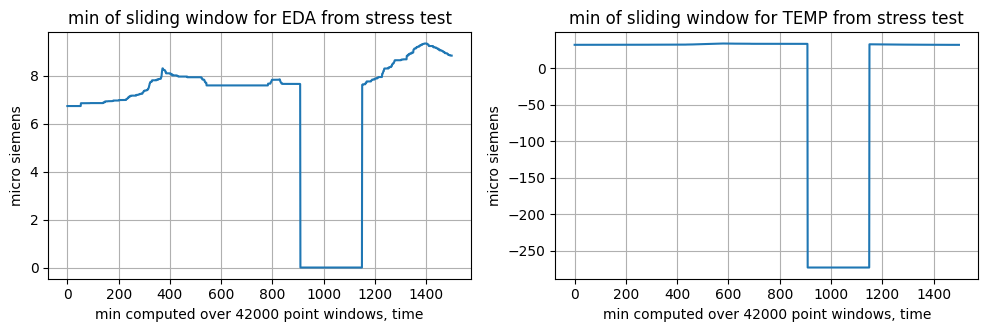

In [41]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=.5)

ax221 = plt.subplot(2, 2, 1)
ax221.plot(list(range_to_plot), eda_features_stress['min'][0:max(range_to_plot)+1])

ax221.set(xlabel='min computed over 42000 point windows, time', ylabel = 'micro siemens',
        title = 'min of sliding window for EDA from stress test')
ax221.grid()

ax222 = plt.subplot(2, 2, 2)
ax222.plot(list(range_to_plot), temp_features_stress['min'][0:max(range_to_plot)+1])

ax222.set(xlabel='min computed over 42000 point windows, time', ylabel = 'micro siemens',
        title = 'min of sliding window for TEMP from stress test')
ax222.grid()

plt.show()

In [44]:
try:
    import statsmodels
except ImportError:
    ! pip3 install statsmodels

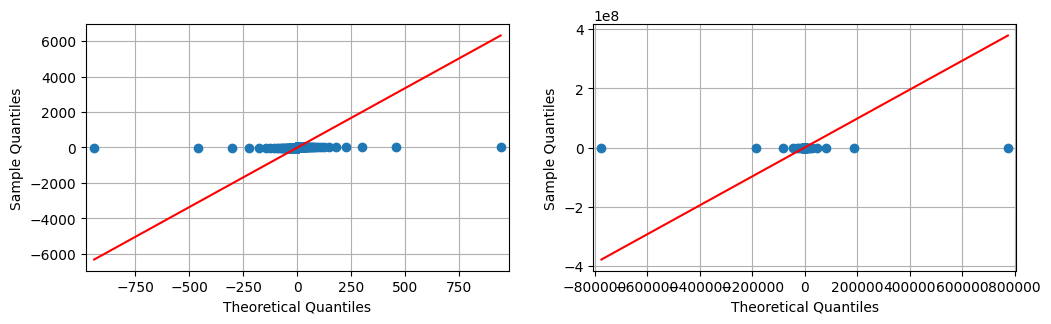

In [43]:
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples
import scipy.stats as stats

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=.5)
ax223 = plt.subplot(2, 2, 3)
qqplot(np.asarray(eda_features_stress['min']), stats.t, fit=True, line='s', ax=ax223)
ax223.grid()

ax224 = plt.subplot(2, 2, 4)
qqplot(np.asarray(temp_features_stress['min']), stats.t, fit=True, line='s', ax=ax224)
ax224.grid()

plt.show()

In [45]:
print("Checking for correlation between TEMP and EDA range.")
corr1, _ = pearsonr(eda_features_base['range'], temp_features_base['range'])
print('Pearsons correlation for base eda vs temp: %.3f' % corr1)
corr2, _ = pearsonr(eda_features_stress['range'], temp_features_stress['range'])
print('Pearsons correlation for stress eda vs temp: %.3f' % corr2)

from scipy.stats import spearmanr
corr3, _ = spearmanr(eda_features_base['range'], temp_features_base['range'])
print('Spearmans correlation for base eda vs temp: %.3f' % corr3)
corr4, _ = spearmanr(eda_features_stress['range'], temp_features_stress['range'])
print('Spearmans correlation for stress eda vs temp: %.3f' % corr4)

Checking for correlation between TEMP and EDA range.
Pearsons correlation for base eda vs temp: 0.712
Pearsons correlation for stress eda vs temp: 0.876
Spearmans correlation for base eda vs temp: 0.459
Spearmans correlation for stress eda vs temp: 0.779


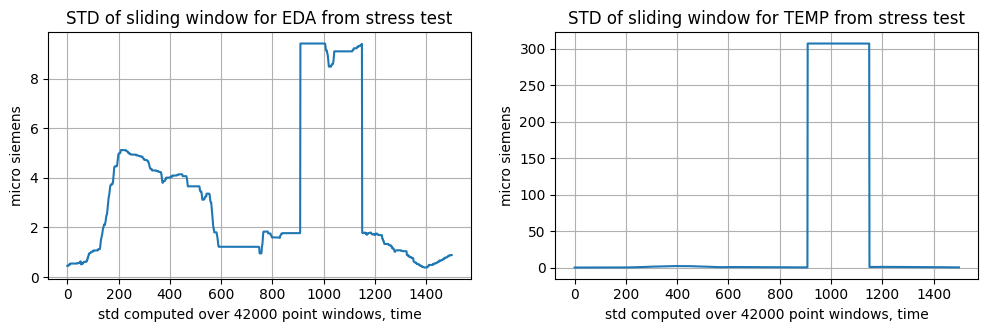

In [46]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=.5)

ax221 = plt.subplot(2, 2, 1)
ax221.plot(list(range_to_plot), eda_features_stress['range'][0:max(range_to_plot)+1])

ax221.set(xlabel='std computed over 42000 point windows, time', ylabel = 'micro siemens',
        title = 'STD of sliding window for EDA from stress test')
ax221.grid()

ax222 = plt.subplot(2, 2, 2)
ax222.plot(list(range_to_plot), temp_features_stress['range'][0:max(range_to_plot)+1])

ax222.set(xlabel='std computed over 42000 point windows, time', ylabel = 'micro siemens',
        title = 'STD of sliding window for TEMP from stress test')
ax222.grid()

plt.show()

In this observation, it appears that there may be a correlation between the EDA and temperature values in the stress experiment range. However, since we are training solely with the baseline data, we do not need to be concerned about this potential correlation, though it is noteworthy.

## ACC
Now that we have learned how to calculate the features for EDA and temperature, it's time to apply the same process to the accelerometer data. Let's compute the desired features for the ACC data, which include:

 - Calculating the mean and standard deviation for each axis, summed over all the axes.
 -  Determining the peak frequency, also known as the maximum value, for each axis.


In [48]:
# Simplify the below exploration by extracting these entries into new variables
temp = subject_three[0]['Temp']
acc = subject_three[0]['ACC']
eda = subject_three[0]['EDA']

temp_stress = subject_three[1]['Temp']
acc_stress = subject_three[1]['ACC']
eda_stress = subject_three[1]['EDA']

print('number of temp values        = ', len(temp))
print('number of eda values         = ', len(eda))
print('number of acc values         = ', len(acc))

print('number of stress temp values = ', len(temp_stress))
print('number of stress eda values  = ', len(eda_stress))
print('number of stress acc values  = ', len(acc_stress))

print(len(acc_stress))

number of temp values        =  798000
number of eda values         =  798000
number of acc values         =  798000
number of stress temp values =  448000
number of stress eda values  =  448000
number of stress acc values  =  448000
448000


In [50]:
window_size = 42000
window_shift = 175
acc_features_base = data.get_features_for_acc(acc, window_size, window_shift)
acc_features_stress = data.get_features_for_acc(acc_stress, window_size, window_shift)

In [51]:
print(type(data.BASELINE_DATA))
print(data.BASELINE_DATA)

<class 'list'>
[{'ACC': array([[ 0.78659999, -0.05980003,  0.50479996],
       [ 0.79100001, -0.06160003,  0.50479996],
       [ 0.79299998, -0.06260002,  0.50179994],
       ...,
       [ 0.85220003, -0.0194    , -0.3592    ],
       [ 0.85099995, -0.01980001, -0.3574    ],
       [ 0.85099995, -0.01899999, -0.35619998]]), 'EDA': array([[7.2227478 ],
       [7.22427368],
       [7.2227478 ],
       ...,
       [6.61582947],
       [6.62078857],
       [6.61735535]]), 'Temp': array([[32.989807],
       [33.030365],
       [33.04239 ],
       ...,
       [31.658417],
       [31.667297],
       [31.662842]], dtype=float32)}]


In [52]:
print('number of acc values mean          = ', len(acc_features_base['mean']))
print('number of stress acc values mean   = ', len(acc_features_stress['mean']))

print('number of acc avalues std           = ', len(acc_features_base['std']))
print('number of stress acc values std    = ', len(acc_features_stress['std']))

number of acc values mean          =  4320
number of stress acc values mean   =  2320
number of acc avalues std           =  4320
number of stress acc values std    =  2320


In [53]:
range_to_plot = range(100)

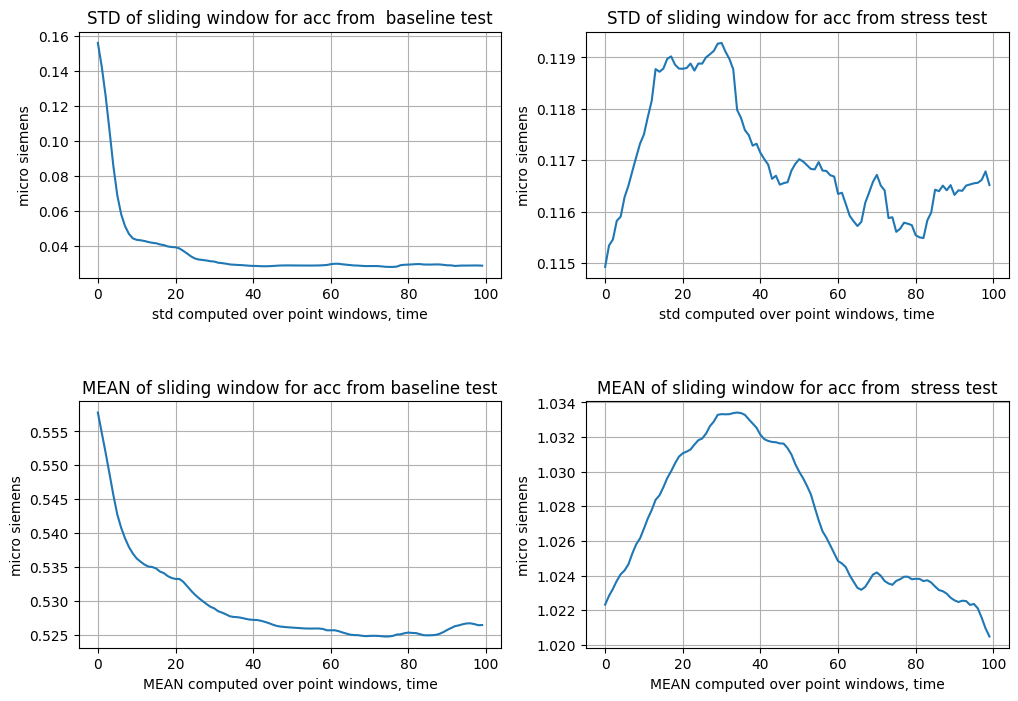

In [54]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=.5)

ax221 = plt.subplot(2, 2, 1)
ax221.plot(list(range_to_plot), acc_features_base['std'][0:max(range_to_plot)+1])

ax221.set(xlabel='std computed over point windows, time', ylabel = 'micro siemens',
       title = 'STD of sliding window for acc from  baseline test')
ax221.grid()

ax222 = plt.subplot(2, 2, 2)
ax222.plot(list(range_to_plot), acc_features_stress['std'][0:max(range_to_plot)+1])

ax222.set(xlabel='std computed over point windows, time', ylabel = 'micro siemens',
        title = 'STD of sliding window for acc from stress test')
ax222.grid()


ax223 = plt.subplot(2, 2, 3)
ax223.plot(list(range_to_plot), acc_features_base['mean'][0:max(range_to_plot)+1])

ax223.set(xlabel='MEAN computed over point windows, time', ylabel = 'micro siemens',
        title = 'MEAN of sliding window for acc from baseline test')
ax223.grid()


ax224 = plt.subplot(2, 2, 4)
ax224.plot(list(range_to_plot), acc_features_stress['mean'][0:max(range_to_plot)+1])

ax224.set(xlabel='MEAN computed over point windows, time', ylabel = 'micro siemens',
       title = 'MEAN of sliding window for acc from  stress test')
ax224.grid()
plt.show()

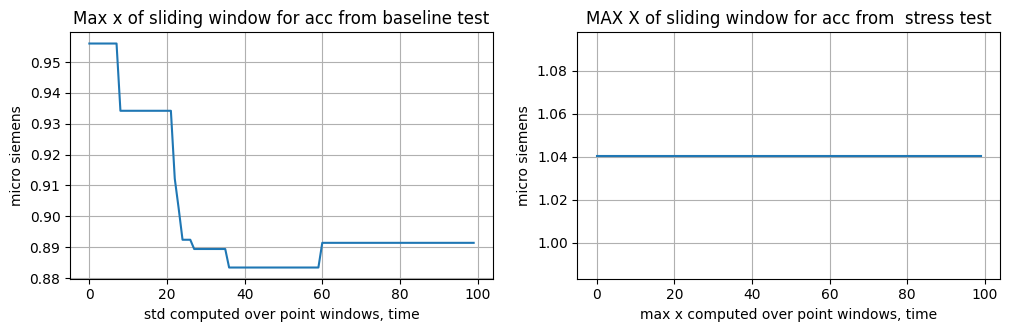

In [55]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=.5)

ax223 = plt.subplot(2, 2, 3)
ax223.plot(list(range_to_plot), acc_features_base['maxx'][0:max(range_to_plot)+1])

ax223.set(xlabel='std computed over point windows, time', ylabel = 'micro siemens',
        title = 'Max x of sliding window for acc from baseline test')
ax223.grid()


ax224 = plt.subplot(2, 2, 4)
ax224.plot(list(range_to_plot), acc_features_stress['maxx'][0:max(range_to_plot)+1])

ax224.set(xlabel='max x computed over point windows, time', ylabel = 'micro siemens',
       title = 'MAX X of sliding window for acc from  stress test')
ax224.grid()
plt.show()